In [1]:
pip install "tensorcircuit[cloud]"

Note: you may need to restart the kernel to use updated packages.


data: {'1': 1035, '0': 1013}
detail info: {'id': 'c9629963-1e5c-4f5a-a4fc-f034a16333af', 'state': 'completed', 'at': 1720465480578582.0, 'shots': 2048, 'device': 'testing', 'results': {'0': 1013, '1': 1035}}
   ┌───┐┌───────┐
q: ┤ H ├┤ Rz(0) ├
   └───┘└───────┘


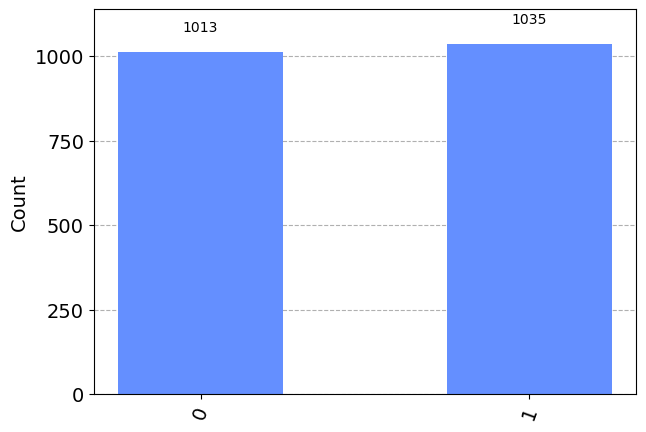

In [7]:
import tensorcircuit as tc
from tensorcircuit.cloud import apis
apis.set_provider("local")

# 调用本地code进行电路模拟
c = tc.Circuit(1)
c.H(0)
c.rz(0, theta=0)
U = c.matrix() # 量子门电路对应的矩阵
states = c.state() # 输出量子态
t = apis.submit_task(circuit=c, device="testing", shots=2048)
data = t.results(blocked=True) #产生0，1态的结果分布
print('data:', data)
detail = t.details() # 产生详细的参数信息
print("detail info:", t.details())

print(c.draw()) #电路可视化图像输出,可选 c.draw(output='mpl')
counts = t.results()
tc.results.counts.plot_histogram(counts) #柱状结果分布